In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

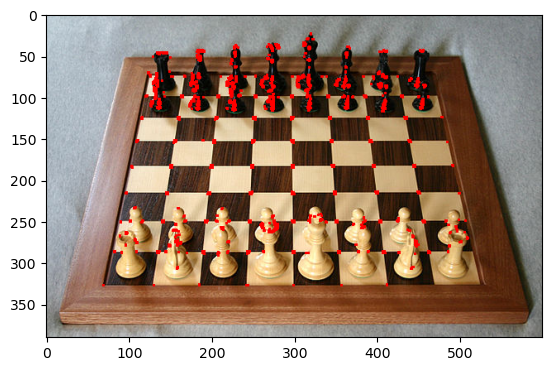

In [15]:
# read images
flat_chess = cv2.imread("DATA/flat_chessboard.png")
real_chess = cv2.imread("DATA/real_chessboard.jpg")

flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

# grayscale
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

# haris corner detection needs floating point values.
gray = np.float32(gray_flat_chess)
gray2 = np.float32(gray_real_chess)

# haris corner detection algorithm
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst2 = cv2.cornerHarris(src=gray2, blockSize=2, ksize=3, k=0.06)
# blockSize: size of neighborhood considered for corner detection
# ksize: size of kernel for sobel operators
# k: harris detector free parameter in the equation

# dilate the corner points to make them more visible
dst = cv2.dilate(dst, None) # optional - for visual only.
dst2 = cv2.dilate(dst2, None) # optional - for visual only.

# whenever my value in the destination image is greater than 1% of the maximum value in the destination image, I'm going to mark that point in the original image as red.
flat_chess[dst>0.01*dst.max()] = [255, 0, 0] # good detection
real_chess[dst2>0.01*dst2.max()] = [255, 0, 0] # poor detection on real chessboard

# plt.imshow(flat_chess)
# plt.imshow(real_chess)

